<CENTER>
    <h1> Geospatial Data Science Applications: GEOG 4/590</h1>
    <h3>Feb 21, 2022</h3>
    <h2>Lecture 8: Visualization</h2>
    <img src="images/coding-computer-programming.jpeg" width="300"/>
    <h3>Johnny Ryan: jryan4@uoregon.edu</h3>
</CENTER>

## Content of this lecture

* Plotting with `matplotlib`
<br>
<br>
* Mapping with `cartopy`
<br>
<br>
* Interactive plotting with `folium`

## `matplotlib`


* The **standard** library for producing visualizations in Python


* Extremely comprehensive functionality


* Many different plot types and options to customize

### Basic

<img src="images/basic3.png" width="900"/>

### Arrays and fields

<img src="images/basic2.png" width="900"/>

### Statistics

<img src="images/basic1.png" width="900"/>

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np

## Coding styles

There are essentially **two** ways to use `matplotlib`:


* 1) **Explicitly create** Figures and Axes, and call methods on them (the **"object-oriented (OO) style"**)


* 2) **Rely** on **pyplot** to **automatically** create and manage the Figures and Axes and use pyplot functions for plotting


**Pyplot** style can be very convenient for **quick interactive** work


We recommend using the **OO style** for complicated plots that are intended to be reused as part of a larger project

### Simple plot in `matplotlib` using "object-oriented (OO) style"

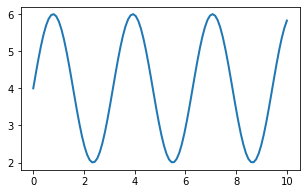

In [2]:
# Make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=2.0) # Set linewidth in pixels
plt.show()

### Simple plot in `matplotlib` using "pyplot style"

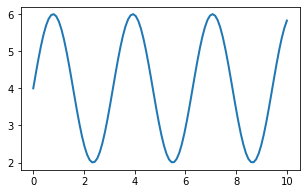

In [3]:
# Make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# Plot data
plt.figure(figsize=(5, 3))
plt.plot(x, y, linewidth=2.0) # Set linewidth in pixels
plt.show()

<img src="images/anatomy.webp" width="600"/>

### Colors and line styles

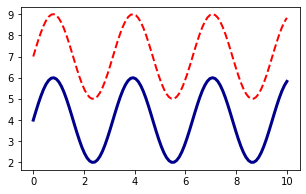

In [4]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue')
ax.plot(x, y+3, linewidth=2.0, color='red', linestyle='--')
plt.show()

### Axes labels and legends

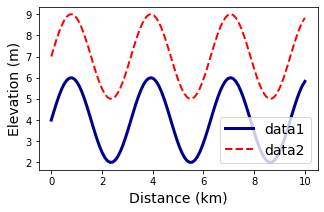

In [5]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue', label='data1')
ax.plot(x, y+3, linewidth=2.0, color='red', linestyle='--', label='data2')

# Plot legend
ax.legend(fontsize=14)

# Set axes labels
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Elevation (m)', fontsize=14)

plt.show()

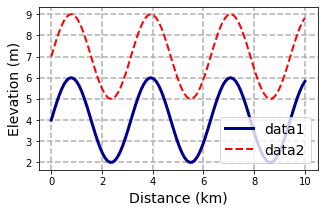

In [6]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue', label='data1')
ax.plot(x, y+3, linewidth=2.0, color='red', linestyle='--', label='data2')

# Plot legend
ax.legend(fontsize=14)

# Set axes labels
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Elevation (m)', fontsize=14)

# Set grid style
ax.grid(linestyle='--', linewidth=1.5)

plt.show()

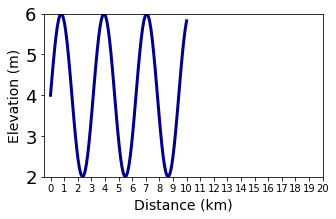

In [7]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue', label='data1')

ax.set_xlabel('Distance (km)', fontsize=14) # Set axes labels
ax.set_ylabel('Elevation (m)', fontsize=14) # Set axes labels
ax.set_ylim(2, 6)                           # Set axes scale
ax.set_xticks(np.arange(0, 21, 1))          # Set tick labels
ax.yaxis.set_tick_params(labelsize=18)      # Set tick label size
ax.grid(False)                              # Hide grid lines
plt.show()

### Produce a figure with two axes

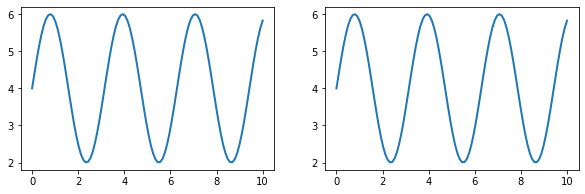

In [8]:
# Create a figure containing two axes
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,3)) 

# Plot data
ax1.plot(x, y, linewidth=2.0)
ax2.plot(x, y, linewidth=2.0)

plt.show()

## Constrained layout

* Automatically adjusts subplots, legends and colorbars etc. so that they **fit in the figure window** while still **preserving**, as best they can, the **logical layout** requested by the user.

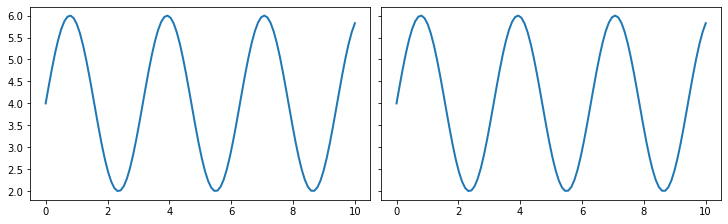

In [9]:
# Create a figure containing two axes
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,3),
                               layout='constrained', sharey=True) 

# Plot data
ax1.plot(x, y, linewidth=2.0)
ax2.plot(x, y, linewidth=2.0)

plt.show()

### More information

https://matplotlib.org/stable/tutorials/index.html

## `cartopy`

* Package designed for geospatial data processing in order to **produce maps** and other geospatial data analyses


* Built using the powerful `PROJ`, `numpy` and `shapely` libraries and includes a programmatic interface built on top of `matplotlib` for the creation of publication quality maps.

In [10]:
# Import packages
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### Simple map of world coastlines

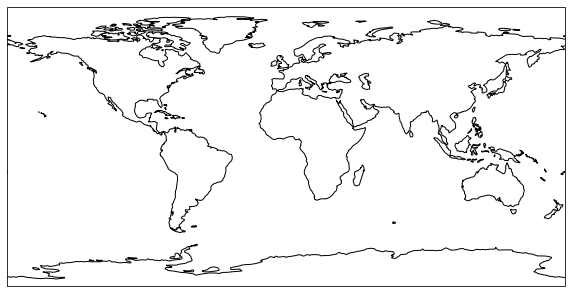

In [11]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines to axes
ax.coastlines()
plt.show()

### Add point data to map

In [12]:
# Coordinates of Seattle and London
seattle_lon, seattle_lat, london_lon, london_lat = -122, 47, 0, 52

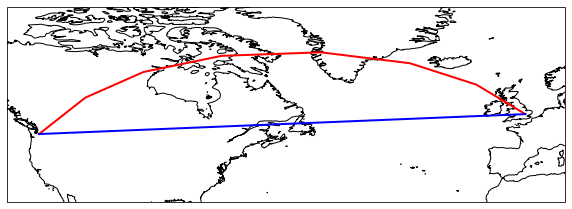

In [13]:
fig = plt.figure(figsize=(10, 10)) # Create figure with no axes
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, 10, 30, 60], ccrs.Geodetic()) # Set extent

# Plot data
plt.plot([seattle_lon, london_lon], [seattle_lat, london_lat], color='red', 
         linewidth=2, transform=ccrs.Geodetic())

plt.plot([seattle_lon, london_lon], [seattle_lat, london_lat], color='blue', 
         linewidth=2, transform=ccrs.PlateCarree())

# Add coastlines to axes
ax.coastlines()

### Add gridded data to map

In [73]:
# Import packages
import xarray as xr

# Define filepath
filepath = '/Users/jryan4/Dropbox (University of Oregon)/Teaching/geospatial-data-science/data/lecture8/'

# Read data
tp = xr.open_dataset(filepath + 'era_2020_tp.nc')

In [53]:
tp['tp'].mean()

<xarray.DataArray 'tp' ()>
array(0.00232061, dtype=float32)

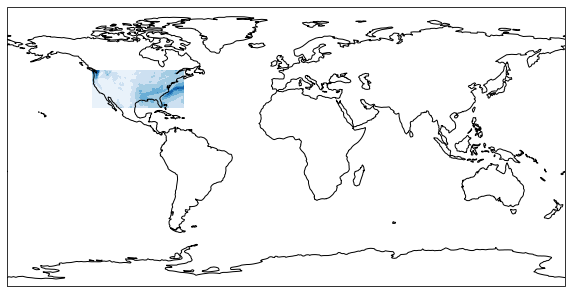

In [15]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), cmap='Blues')
plt.show()

### Change projection systems

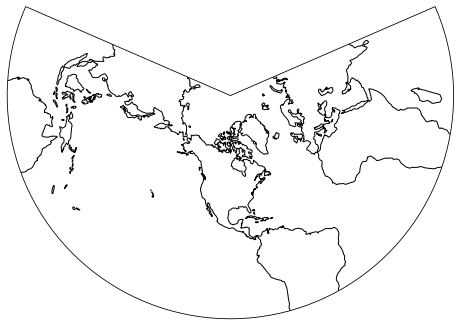

In [16]:
# Create figure with no axes
fig = plt.figure(figsize=(8, 8))

# Define a GeoAxes instance with LambertConformal projection
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), cmap='Blues')
plt.show()

### Change projection and define data transform

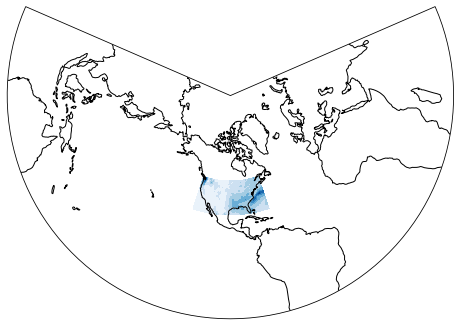

In [17]:
data_crs = ccrs.PlateCarree() # Specify data coordinate system
fig = plt.figure(figsize=(8, 8)) # Create figure with no axes

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), 
            transform=data_crs, cmap='Blues')
plt.show()

### Set map extent

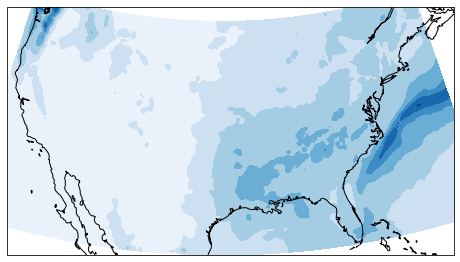

In [18]:
# Create figure with no axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

# Set extent 
ax.set_extent([-120, -70, 25, 48], crs=ccrs.PlateCarree())

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), 
            transform=data_crs, cmap='Blues')
plt.show()

## `folium`

* Sometimes interactive, web-based displays of geospatial data are more useful/powerful than static figures


* `folium` is a web mapping framework based on `Leaflet` that allows us to produce interactive maps


In [19]:
# Import package
import folium

### Basics

In [20]:
# Open a map at specific loction and zoom
m = folium.Map(location=[45.5236, -122.6750], zoom_start=11)
m

### Tiles

* The default tiles are **OpenStreetMap**, but others tiles (e.g. **Stamen Terrain**, **Stamen Toner**) are built in. Some of them require an API key.

In [21]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")
m

### Adding markers with labels

In [22]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")
folium.Marker([45.3288, -121.6625], 
              popup="<i>Mt. Hood Meadows</i>").add_to(m)
folium.Marker([45.3311, -121.7113], 
              popup="<b>Timberline Lodge</b>", 
              icon=folium.Icon(color="red", icon="info-sign")).add_to(m)
m

### Chloropleth maps

In [67]:
!pip install regionmask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 2.2 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)


In [118]:
# Import packages
import geopandas as gpd
import regionmask

# Define filepath
filepath = '/Users/jryan4/Dropbox (University of Oregon)/Teaching/geospatial-data-science/data/lecture8/'

# Read shapefile
states = gpd.read_file(filepath + 'us_mainland_states.shp')
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [119]:
# Convert coordinate system
states_wgs84 = states.to_crs('EPSG:4326')
states_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Plot 

* `geopandas` provides a high-level interface to the `matplotlib` library for making maps

<AxesSubplot:>

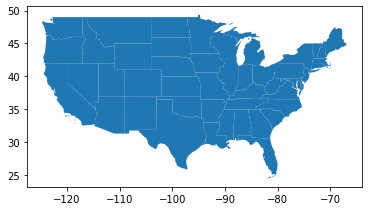

In [121]:
states_wgs84.plot()

### Plot simple chloropleth map

<AxesSubplot:>

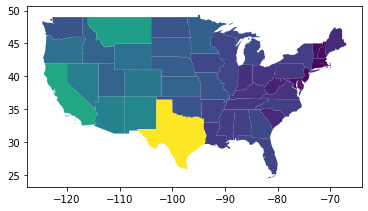

In [122]:
states_wgs84.plot(column='ALAND')